In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy
%matplotlib inline
import pylab
import math

In [11]:
from numpy import array
np.arange(38)
velocity = array([1.32666709e+05, 1.13628673e+05, 1.00391570e+05, 8.96188363e+04, 7.75637462e+04, 6.50887959e+04, 5.51862853e+04, 4.77656956e+04, 4.30855144e+04, 3.84630328e+04, 3.54163206e+04, 3.16144128e+04, 2.88068823e+04, 2.59779253e+04, 2.36695572e+04, 2.17921013e+04, 1.98584755e+04, 1.79122810e+04, 1.66651277e+04, 1.51892714e+04, 1.34224825e+04, 1.21081721e+04, 1.10348423e+04, 1.02659328e+04, 9.16400231e+03, 8.35072812e+03, 7.53122564e+03, 7.00562693e+03, 6.25214954e+03, 5.40920539e+03, 3.68894264e+03, 2.06684627e+03, 1.12264205e+03, 6.69274146e+02, 4.28961737e+02, 1.97458305e+02, 1.06147726e+02, 7.35217265e+01])
print velocity

[  1.32666709e+05   1.13628673e+05   1.00391570e+05   8.96188363e+04
   7.75637462e+04   6.50887959e+04   5.51862853e+04   4.77656956e+04
   4.30855144e+04   3.84630328e+04   3.54163206e+04   3.16144128e+04
   2.88068823e+04   2.59779253e+04   2.36695572e+04   2.17921013e+04
   1.98584755e+04   1.79122810e+04   1.66651277e+04   1.51892714e+04
   1.34224825e+04   1.21081721e+04   1.10348423e+04   1.02659328e+04
   9.16400231e+03   8.35072812e+03   7.53122564e+03   7.00562693e+03
   6.25214954e+03   5.40920539e+03   3.68894264e+03   2.06684627e+03
   1.12264205e+03   6.69274146e+02   4.28961737e+02   1.97458305e+02
   1.06147726e+02   7.35217265e+01]


In [82]:
def slope(dx, dy):
    return (dy / dx) if dx else None

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __str__(self):
        return '({}, {})'.format(self.x, self.y)

    def __repr__(self):
        return 'Point({}, {})'.format(self.x, self.y)

    def halfway(self, target):
        midx = (self.x + target.x) / 2
        midy = (self.y + target.y) / 2
        return Point(midx, midy)

    def distance(self, target):
        dx = target.x - self.x
        dy = target.y - self.y
        return (dx*dx + dy*dy) ** 0.5

    def reflect_x(self):
        return Point(-self.x,self.y)

    def reflect_y(self):
        return Point(self.x,-self.y)

    def reflect_x_y(self):
        return Point(-self.x, -self.y)

    def slope_from_origin(self):
        return slope(self.x, self.y)

    def slope(self, target):
        return slope(target.x - self.x, target.y - self.y)

    def y_int(self, target):       # <= here's the magic
        return self.y - self.slope(target)*self.x

    def line_equation(self, target):
        slope = self.slope(target)

        y_int = self.y_int(target)
        if y_int < 0:
            y_int = -y_int
            sign = '-'
        else:
            sign = '+'

        return 'y = {}x {} {}'.format(slope, sign, y_int)

    def line_function(self, target):
        slope = self.slope(target)
        y_int = self.y_int(target)
        def fn(x):
            return slope*x + y_int
        return fn

In [85]:
c1 = Point(1.00552700e+01,1.32666709e+05)
d1 = Point(3.27405712e+07, 7.35217265e+01)
print(c1.line_equation(d1))

t1 = Point(1.00552700e+01, 7.14336614e+04)
t2 = Point(3.27405712e+07, 4.19702622e+14)
print(t1.line_equation(t2))

y = -0.00404981413383x + 132666.749722
y = 12819041.8018x - 128827492.797


In [26]:
def Speed(x):
    if ((x >= 1.00552700e+01) & (x <= 3.27405712e+07)):
        return -0.00404981413383*x + 132666.749722
    else:
        return 3*x

In [169]:
print Speed(3.27405712e+07)

73.5217265726


In [90]:
   def Time_in_Orbit(x):
    if ((x >= 1.00552700e+01) & (x <= 3.27405712e+07)):
        return 12819041.8018*x - 128827492.797
    else:
        return 3*x

In [253]:
np.arange(9)
i = array([0, np.pi/6, np.pi/4, np.pi/3, np.pi/2, np.pi*2/3, np.pi*3/4, np.pi*5/6, np.pi])
print i

[ 0.          0.52359878  0.78539816  1.04719755  1.57079633  2.0943951
  2.35619449  2.61799388  3.14159265]


In [265]:
Vx = Speed(1.00552700e+01)*cos(i)
Vy = Speed(1.00552700e+01)*sin(i)

Vx1 = Speed(3.27405712e+07)*cos(i)
Vy1 = Speed(3.27405712e+07)*sin(i)

print Vx

[  1.32666709e+05   1.14892740e+05   9.38095296e+04   6.63333545e+04
   8.12349303e-12  -6.63333545e+04  -9.38095296e+04  -1.14892740e+05
  -1.32666709e+05]


In [259]:
np.arange(9)
time = array([Time_in_Orbit(1.00552700e+01), Time_in_Orbit(1.19627381e+02),Time_in_Orbit(7.67085479e+02), Time_in_Orbit(1.20714788e+03), Time_in_Orbit(1.30051044e+04), Time_in_Orbit( 1.40421962e+05),Time_in_Orbit(4.53906956e+06), Time_in_Orbit(1.57071089e+07), Time_in_Orbit(3.27405712e+07)])

In [293]:
time1 = [10**1,10**2,10**3,10**4,10**5,10**6,10**7,10**8,10**9]
print time

[  7.14336614e+04   1.40468090e+09   9.70447333e+09   1.53456516e+10
   1.66584149e+11   1.79994617e+12   5.81863936e+13   2.01349957e+14
   4.19702622e+14]


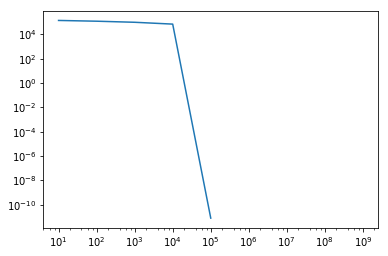

In [294]:
logPlot = plt.gca()
logPlot.loglog(time1,Vx)

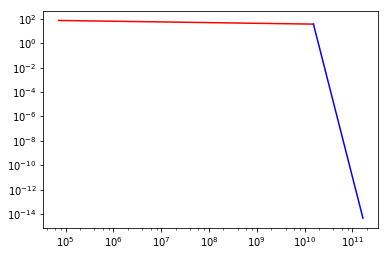